In [11]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
import os
import openai

import pandas as pd
import os
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import bokeh
import os
import openai
from openai import OpenAI
import backoff
import numpy as np
from sklearn.cluster import KMeans
import backoff
import requests 

In [12]:
# Load embeddings file

# input the path to your saved embeddings
path = '/Users/ellenbowen/Desktop/Michigan/Siwo_lab/'
file = str(path) + 'phecode_gpt_embedding.pkl'

embeddings_df = pd.read_pickle(file)

In [13]:
embeddings_df

,phecode,phenotype,phecode_exclude_range,sex,rollup,leaf,category_number,category,embeddings
0,8.00,Intestinal infection,001-009.99,NaN,1,0,1,infectious diseases,"[0.0068802302703261375, 0.0005461262771859765,..."
1,8.50,Bacterial enteritis,001-009.99,Both,1,0,1,infectious diseases,"[-0.010700925253331661, 1.566567698318977e-05,..."
2,8.51,Intestinal e.coli,001-009.99,Both,1,1,1,infectious diseases,"[0.01900758408010006, -0.0076250554993748665, ..."
3,8.52,Intestinal infection due to C. difficile,001-009.99,Both,1,1,1,infectious diseases,"[0.013732682913541794, -0.013513063080608845, ..."
4,8.60,Viral Enteritis,001-009.99,Both,1,1,1,infectious diseases,"[-0.01282576099038124, -0.0019294519443064928,..."
...,...,...,...,...,...,...,...,...,...
1861,994.00,Sepsis and SIRS,994-994.99,NaN,1,0,18,injuries & poisonings,"[-0.009411283768713474, -0.011322950012981892,..."
1862,994.10,Systemic inflammatory response syndrome (SIRS),994-994.99,Both,1,1,18,injuries & poisonings,"[-0.036918796598911285, -0.012674717232584953,..."
1863,994.20,Sepsis,994-994.99,Both,1,0,18,injuries & poisonings,"[0.004166525788605213, -0.005852119065821171, ..."
1864,994.21,Septic shock,994-994.99,Both,1,1,18,injuries & poisonings,"[-0.012952380813658237, 0.0007000957266427577,..."


In [14]:
#define API from global variable

openai.api_key = os.environ.get("OPENAI_API_KEY")

# try and catch to call OpenAI API

@backoff.on_exception(backoff.expo, requests.exceptions.RequestException, max_tries=8)
def get_embedding(text, model="text-embedding-ada-002"):
    text = text.replace("\n", " ")
    try:
        return openai.embeddings.create(input=[text], model=model).data[0].embedding
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        raise  # Re-raise the exception to trigger backoff




In [20]:
mendelian_dx = ['Nocturnal frontal lobe epilepsy 1',
'Nephrotic syndrome type 7',
'Sulfocysteinuria',
'Charcotte Marie Tooth Disease 2A',
'Spastic Paraplegia 30',
'Factor X deficiency',
'Hemochromatosis',
'Thyroid dyshormonogenesis',
'Familial erythrocytosis 1',
'Spinocerebellar ataxia',
'Interstitial nephritis karyomegalic',
'HARP syndrome',
'Essential thrombocythemia',
'Primary hyperoxaluria type 1',
'Familial cold autoinflammatory syndrome 3']

# Create a DataFrame
mendelian_dx_df = pd.DataFrame(mendelian_dx, columns=['disease'])



In [22]:
# Apply the get_embedding function to each row and create a new column for embeddings
mendelian_dx_df['embeddings'] = mendelian_dx_df['disease'].apply(lambda x: get_embedding(x))


In [24]:
# Save the DataFrame to a .pkl file
mendelian_dx_df.to_pickle('mendelian_diseases_embeddings.pkl')

In [26]:
import pandas as pd

# Rename the first column in mendelian_dx_df
mendelian_dx_df.rename(columns={"disease": "phenotype"}, inplace=True)

# Concatenate mendelian_dx_df to embeddings_df
combined_df = pd.concat([embeddings_df, mendelian_dx_df], ignore_index=True)



In [27]:
combined_df

,phecode,phenotype,phecode_exclude_range,sex,rollup,leaf,category_number,category,embeddings
0,8.00,Intestinal infection,001-009.99,NaN,1.0,0.0,1.0,infectious diseases,"[0.0068802302703261375, 0.0005461262771859765,..."
1,8.50,Bacterial enteritis,001-009.99,Both,1.0,0.0,1.0,infectious diseases,"[-0.010700925253331661, 1.566567698318977e-05,..."
2,8.51,Intestinal e.coli,001-009.99,Both,1.0,1.0,1.0,infectious diseases,"[0.01900758408010006, -0.0076250554993748665, ..."
3,8.52,Intestinal infection due to C. difficile,001-009.99,Both,1.0,1.0,1.0,infectious diseases,"[0.013732682913541794, -0.013513063080608845, ..."
4,8.60,Viral Enteritis,001-009.99,Both,1.0,1.0,1.0,infectious diseases,"[-0.01282576099038124, -0.0019294519443064928,..."
...,...,...,...,...,...,...,...,...,...
1876,NaN,Interstitial nephritis karyomegalic,NaN,NaN,NaN,NaN,NaN,NaN,"[-0.00862308219075203, 0.012200672179460526, 0..."
1877,NaN,HARP syndrome,NaN,NaN,NaN,NaN,NaN,NaN,"[-0.029692986980080605, -0.002755397232249379,..."
1878,NaN,Essential thrombocythemia,NaN,NaN,NaN,NaN,NaN,NaN,"[-0.04577336460351944, -0.03554628789424896, 0..."
1879,NaN,Primary hyperoxaluria type 1,NaN,NaN,NaN,NaN,NaN,NaN,"[0.019598426297307014, 0.004414886236190796, 0..."


In [28]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Ensure embeddings are in the correct format
def parse_embedding(embedding):
    if isinstance(embedding, str):
        return np.array(eval(embedding))
    return np.array(embedding)

combined_df['embeddings'] = combined_df['embeddings'].apply(parse_embedding)
embeddings = np.vstack(combined_df['embeddings'].values)

# Compute the cosine similarity matrix
cosine_sim_matrix = cosine_similarity(embeddings)

# Create a DataFrame for the similarity matrix with phenotype labels
similarity_df = pd.DataFrame(cosine_sim_matrix, index=combined_df['phenotype'], columns=combined_df['phenotype'])






In [29]:
similarity_df

phenotype,Intestinal infection,Bacterial enteritis,Intestinal e.coli,Intestinal infection due to C. difficile,Viral Enteritis,Intestinal infection due to protozoa,Tuberculosis,Diseases due to other mycobacteria,Leprosy,Septicemia,...,Factor X deficiency,Hemochromatosis,Thyroid dyshormonogenesis,Familial erythrocytosis 1,Spinocerebellar ataxia,Interstitial nephritis karyomegalic,HARP syndrome,Essential thrombocythemia,Primary hyperoxaluria type 1,Familial cold autoinflammatory syndrome 3
phenotype,,,,,,,,,,,,,,,,,,,,,
Intestinal infection,1.000000,0.888368,0.907635,0.924155,0.866907,0.930722,0.811887,0.777187,0.789209,0.843248,...,0.778016,0.790760,0.752318,0.755335,0.764811,0.782787,0.732231,0.754505,0.754680,0.774340
Bacterial enteritis,0.888368,1.000000,0.898892,0.860644,0.944254,0.862636,0.813211,0.775117,0.788714,0.838129,...,0.762374,0.792854,0.749529,0.782874,0.778017,0.777481,0.751729,0.768384,0.759795,0.781598
Intestinal e.coli,0.907635,0.898892,1.000000,0.887033,0.868051,0.884783,0.805906,0.777315,0.770433,0.831667,...,0.771029,0.785970,0.742437,0.780674,0.763287,0.786469,0.729654,0.770861,0.762344,0.780310
Intestinal infection due to C. difficile,0.924155,0.860644,0.887033,1.000000,0.835245,0.903699,0.799701,0.795897,0.782623,0.827805,...,0.770656,0.767189,0.731528,0.738596,0.759202,0.779411,0.734147,0.744673,0.750773,0.772325
Viral Enteritis,0.866907,0.944254,0.868051,0.835245,1.000000,0.835917,0.806582,0.750395,0.774189,0.808450,...,0.766019,0.786741,0.749361,0.783856,0.775598,0.780851,0.768097,0.762581,0.757613,0.786642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Interstitial nephritis karyomegalic,0.782787,0.777481,0.786469,0.779411,0.780851,0.781693,0.806606,0.776035,0.766386,0.784891,...,0.750025,0.779857,0.782136,0.804826,0.774854,1.000000,0.771017,0.800180,0.797642,0.816607
HARP syndrome,0.732231,0.751729,0.729654,0.734147,0.768097,0.726855,0.783837,0.739438,0.776784,0.754860,...,0.782210,0.811854,0.778046,0.791236,0.786998,0.771017,1.000000,0.769267,0.786308,0.807871
Essential thrombocythemia,0.754505,0.768384,0.770861,0.744673,0.762581,0.755100,0.813787,0.766817,0.766011,0.800273,...,0.806666,0.829903,0.800433,0.842591,0.767323,0.800180,0.769267,1.000000,0.782946,0.788192


In [30]:
# Save the similarity matrix to a CSV file
similarity_df.to_csv('similarity_matrix_with_mendelian_diseases_phecodes.csv')


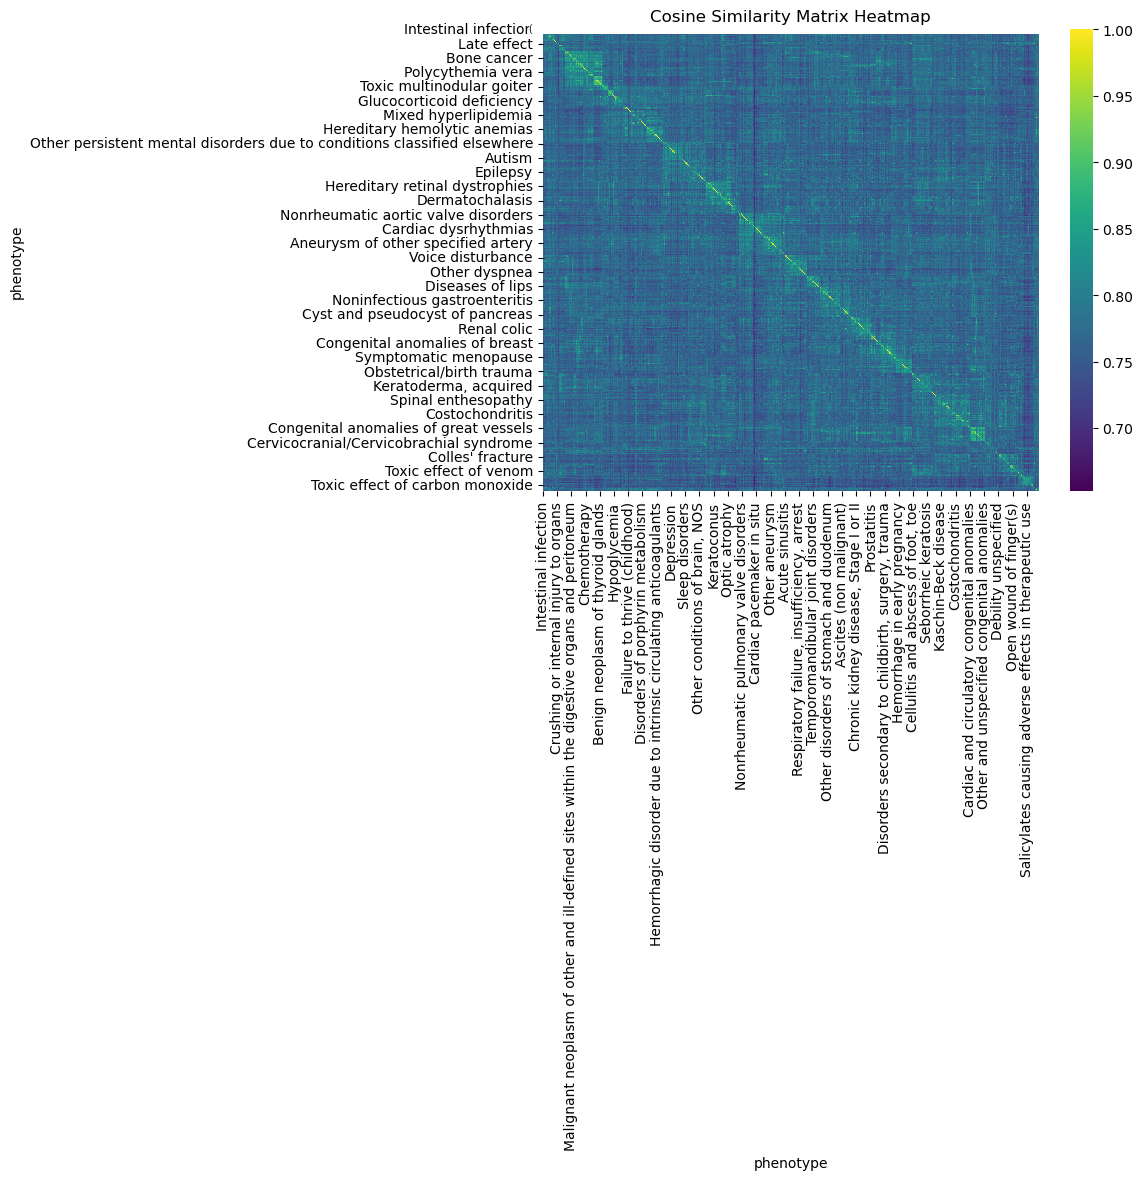

In [31]:
# Plotting the heatmap
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(similarity_df, annot=True, cmap='viridis')
plt.title('Cosine Similarity Matrix Heatmap')
plt.show()

In [28]:

# def find_similar_phenotypes(df, query, top_n=5):
#     row = df.loc[query]

#     # Sort the values in descending order
#     sorted_row = row.sort_values(ascending=False)

#     # Select the top n values
#     top_values = sorted_row.head(top_n)
#     return top_values

# # Example usage
# query_phenotype = "Intestinal infection"
# top_n = 5
# similar_phenotypes = find_similar_phenotypes(similarity_df, query_phenotype, top_n)
# print(similar_phenotypes)

In [32]:
import pandas as pd
import difflib

def find_similar_phenotypes(df, query, top_n=5):
    
    print("Search term: " + str(query))
    # Normalize the query to lowercase
    query = query.lower()
    
    # Normalize the dataframe index to lowercase
    normalized_index = df.index.str.lower()
    
    # Find the closest match for the query
    closest_match = difflib.get_close_matches(query, normalized_index, n=1, cutoff=0.6)
    print("Showing results for : " + str(closest_match))
    
    if not closest_match:
        raise ValueError(f"Query phenotype '{query}' not found in the dataframe.")
    
    # Get the actual index of the closest match
    actual_query = df.index[normalized_index == closest_match[0]].tolist()[0]
    
    # Select the row for the query phenotype
    row = df.loc[actual_query]

    # Sort the values in descending order
    sorted_row = row.sort_values(ascending=False)

    # Select the top n values
    top_values = sorted_row.head(top_n)
    
    return top_values

# Example usage
# Assuming similarity_df is your dataframe with similarity scores
query_phenotype = "intestinal infection"
top_n = 10
similar_phenotypes = find_similar_phenotypes(similarity_df, query_phenotype, top_n)
print(similar_phenotypes)


Search term: intestinal infection
Showing results for : ['intestinal infection']
phenotype
Intestinal infection                        1.000000
Intestinal infection due to protozoa        0.930722
Intestinal infection due to C. difficile    0.924155
Intestinal e.coli                           0.907635
Other intestinal obstruction                0.888486
Bacterial enteritis                         0.888368
Intestinal helminthiases                    0.885410
Viral infection                             0.880845
Impaction of intestine                      0.878694
Ulceration of intestine                     0.878454
Name: Intestinal infection, dtype: float64
